<a href="https://colab.research.google.com/github/sriram1105-m/CE888---Data-Science-and-Decision-Making/blob/main/Project1/Wildfire_detection_using_ResNet_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 31kB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import PIL
from PIL import Image

import keras

In [3]:
image_train = keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/OneDrive_1_1-27-2021.zip (Unzipped Files)/Training.zip (Unzipped Files)/Training',
                                                          labels  = "inferred", label_mode = "int", color_mode = "rgb")

image_test = keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/OneDrive_1_1-27-2021.zip (Unzipped Files)/Test.zip (Unzipped Files)/Test',
                                                          labels  = "inferred", label_mode = "int", color_mode = "rgb")

Found 39375 files belonging to 2 classes.
Found 8617 files belonging to 2 classes.


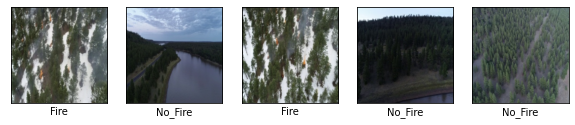

In [4]:
# Get the list of class names
# The encoded number is the index of the class_names list
class_name = image_train.class_names

fig,ax = plt.subplots(1,5,figsize=(10,10))
ax = ax.flat

# Get the first batch of dataset, it has batch_size(64) images and corresponding labels
# Let's show the first 25 images
for images,labels in image_train.take(1):
    for i in range(5):
        ax[i].imshow(images[i].numpy().astype('uint8'))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(class_name[labels[i]])
plt.show()

In [5]:
# Importing the required libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# Data Preprocessing
#Image Data Generator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,   # Stretches and slant the image to a particular angle
                                   rotation_range = 20, # randomly rotates the image so that the model become inavariant to object orientation
                                   zoom_range = 0.2,    #randomly zoom-in or zoom-out the image
                                   brightness_range = [0.8, 1.2], #range changes the brightness of the image
                                   horizontal_flip = True) #randomly flips the image horizontally

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/OneDrive_1_1-27-2021.zip (Unzipped Files)/Training.zip (Unzipped Files)/Training',
                                                  target_size = (224, 224),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/OneDrive_1_1-27-2021.zip (Unzipped Files)/Test.zip (Unzipped Files)/Test',
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'binary')

Found 39375 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


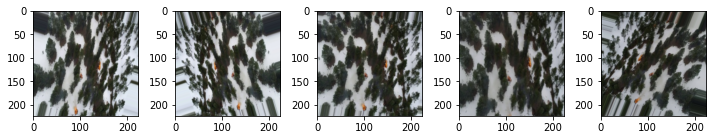

In [7]:
# Visualizing images after augmenting
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [training_set[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# Using ResNet model
resnet = ResNet152V2(input_shape = (224, 224, 3), weights = 'imagenet', include_top = False) #using input shape the size of the images were reshaped to 224x224

for layer in resnet.layers:
  layer.trainable = False

In [ ]:
# Model Summary
print(resnet.summary())

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [ ]:
#Importing required libraries
from keras.layers import Dropout
from keras import models, regularizers, layers, optimizers, losses, metrics

In [ ]:
# Modelling
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dropout(0.60))
model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dropout(0.60))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Model Summary after modelling
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                6422592   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 64,754,305
Trainable params: 6,422,657
Non-trainable params: 58,331,648
____________________________________

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    min_delta = 0,
    patience = 3,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
)

In [ ]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                6422592   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 64,754,305
Trainable params: 6,422,657
Non-trainable params: 58,331,648
____________________________________

In [ ]:
#Fitting the model
history = model.fit(training_set, steps_per_epoch = 10, epochs = 100, callbacks = [callback])

Epoch 1/100
10/10 [==============================] - 208s 21s/step - loss: 1.0118 - accuracy: 0.8750


Epoch 2/100
10/10 [==============================] - 206s 21s/step - loss: 0.3401 - accuracy: 0.9219


Epoch 3/100
10/10 [==============================] - 199s 20s/step - loss: 0.2749 - accuracy: 0.9344


Epoch 4/100
10/10 [==============================] - 189s 19s/step - loss: 0.4771 - accuracy: 0.9406


Epoch 5/100
10/10 [==============================] - 195s 20s/step - loss: 0.3116 - accuracy: 0.9438


Epoch 6/100
10/10 [==============================] - 190s 19s/step - loss: 0.2854 - accuracy: 0.9594


Epoch 7/100
10/10 [==============================] - 198s 19s/step - loss: 0.2451 - accuracy: 0.9438


Epoch 8/100
10/10 [==============================] - 177s 18s/step - loss: 0.2426 - accuracy: 0.9594


Epoch 9/100
10/10 [==============================] - 208s 21s/step - loss: 0.2119 - accuracy: 0.9563


Epoch 10/100
10/10 [==============================] - 187s 19s/step - loss: 0.3225 - accuracy: 0.9438


Epoch 11/100
10/10 [==============================] - 179s 18s/step - loss: 0.2809 - accuracy: 0.9375


Epoch 12/100
10/10 [==============================] - 181s 18s/step - loss: 0.2805 - accuracy: 0.9438


Epoch 13/100
10/10 [==============================] - 179s 18s/step - loss: 0.2065 - accuracy: 0.9594


Epoch 14/100
10/10 [==============================] - 184s 18s/step - loss: 0.2324 - accuracy: 0.9500


Epoch 15/100
10/10 [==============================] - 164s 16s/step - loss: 0.2487 - accuracy: 0.9594


Epoch 16/100
10/10 [==============================] - 167s 17s/step - loss: 0.2720 - accuracy: 0.9375


Epoch 17/100
10/10 [==============================] - 170s 17s/step - loss: 0.3592 - accuracy: 0.9656


Epoch 18/100
10/10 [==============================] - 172s 17s/step - loss: 0.2763 - accuracy: 0.9312


Epoch 19/100
10/10 [==============================] - 168s 17s/step - loss: 0.2867 - accuracy: 0.9406


Epoch 20/100
10/10 [==============================] - 168s 17s/step - loss: 0.2875 - accuracy: 0.9312


Epoch 21/100
10/10 [==============================] - 173s 17s/step - loss: 0.2768 - accuracy: 0.9438


Epoch 22/100
10/10 [==============================] - 160s 16s/step - loss: 0.2806 - accuracy: 0.9531


Epoch 23/100
10/10 [==============================] - 164s 16s/step - loss: 0.3151 - accuracy: 0.9500


Epoch 24/100
10/10 [==============================] - 163s 16s/step - loss: 0.2654 - accuracy: 0.9594


Epoch 25/100
10/10 [==============================] - 164s 16s/step - loss: 0.2421 - accuracy: 0.9656


Epoch 26/100
10/10 [==============================] - 150s 15s/step - loss: 0.2300 - accuracy: 0.9594


Epoch 27/100
10/10 [==============================] - 160s 16s/step - loss: 0.2551 - accuracy: 0.9500


Epoch 28/100
10/10 [==============================] - 162s 16s/step - loss: 0.2673 - accuracy: 0.9500


Epoch 29/100
10/10 [==============================] - 153s 16s/step - loss: 0.2927 - accuracy: 0.9563


Epoch 30/100
10/10 [==============================] - 163s 16s/step - loss: 0.2573 - accuracy: 0.9531


Epoch 31/100
10/10 [==============================] - 145s 15s/step - loss: 0.2364 - accuracy: 0.9625


Epoch 32/100
10/10 [==============================] - 147s 15s/step - loss: 0.1968 - accuracy: 0.9719


Epoch 33/100
10/10 [==============================] - 142s 14s/step - loss: 0.2180 - accuracy: 0.9625


Epoch 34/100
10/10 [==============================] - 142s 14s/step - loss: 0.2129 - accuracy: 0.9656


Epoch 35/100
10/10 [==============================] - 141s 14s/step - loss: 0.1895 - accuracy: 0.9719


Epoch 36/100
10/10 [==============================] - 151s 15s/step - loss: 0.2409 - accuracy: 0.9688


Epoch 37/100
10/10 [==============================] - 140s 14s/step - loss: 0.3013 - accuracy: 0.9406


Epoch 38/100
10/10 [==============================] - 145s 14s/step - loss: 0.2687 - accuracy: 0.9375


Epoch 39/100
10/10 [==============================] - 137s 14s/step - loss: 0.2360 - accuracy: 0.9594


Epoch 40/100
10/10 [==============================] - 140s 14s/step - loss: 0.1833 - accuracy: 0.9781


Epoch 41/100
10/10 [==============================] - 150s 15s/step - loss: 0.1938 - accuracy: 0.9719


Epoch 42/100
10/10 [==============================] - 135s 13s/step - loss: 0.2068 - accuracy: 0.9812


Epoch 43/100
10/10 [==============================] - 134s 13s/step - loss: 0.3749 - accuracy: 0.9438


Epoch 44/100
10/10 [==============================] - 122s 12s/step - loss: 0.3153 - accuracy: 0.9563


Epoch 45/100
10/10 [==============================] - 131s 13s/step - loss: 0.2638 - accuracy: 0.9438


Epoch 46/100
10/10 [==============================] - 133s 13s/step - loss: 0.2522 - accuracy: 0.9563


Epoch 47/100
10/10 [==============================] - 127s 12s/step - loss: 0.2770 - accuracy: 0.9406


Epoch 48/100
10/10 [==============================] - 129s 13s/step - loss: 0.2459 - accuracy: 0.9563


Epoch 49/100
10/10 [==============================] - 114s 12s/step - loss: 0.2343 - accuracy: 0.9594


Epoch 50/100
10/10 [==============================] - 113s 11s/step - loss: 0.2319 - accuracy: 0.9688


Epoch 51/100
10/10 [==============================] - 125s 12s/step - loss: 0.2381 - accuracy: 0.9531


Epoch 52/100
10/10 [==============================] - 117s 12s/step - loss: 0.2449 - accuracy: 0.9531


Epoch 53/100
10/10 [==============================] - 121s 12s/step - loss: 0.2745 - accuracy: 0.9438


Epoch 54/100
10/10 [==============================] - 114s 11s/step - loss: 0.2472 - accuracy: 0.9563


Epoch 55/100
10/10 [==============================] - 119s 12s/step - loss: 0.2547 - accuracy: 0.9750


Epoch 56/100
10/10 [==============================] - 117s 11s/step - loss: 0.3256 - accuracy: 0.9531


Epoch 57/100
10/10 [==============================] - 123s 13s/step - loss: 0.2811 - accuracy: 0.9406


Epoch 58/100
10/10 [==============================] - 113s 11s/step - loss: 0.2639 - accuracy: 0.9469


Epoch 59/100
10/10 [==============================] - 107s 11s/step - loss: 0.2421 - accuracy: 0.9625


Epoch 60/100
10/10 [==============================] - 118s 12s/step - loss: 0.2707 - accuracy: 0.9625


Epoch 61/100
10/10 [==============================] - 116s 11s/step - loss: 0.2466 - accuracy: 0.9656


Epoch 62/100
10/10 [==============================] - 117s 12s/step - loss: 0.2412 - accuracy: 0.9625


Epoch 63/100
10/10 [==============================] - 110s 11s/step - loss: 0.2405 - accuracy: 0.9719


Epoch 64/100
10/10 [==============================] - 104s 10s/step - loss: 0.2854 - accuracy: 0.9469


Epoch 65/100
10/10 [==============================] - 110s 10s/step - loss: 0.2563 - accuracy: 0.9719


Epoch 66/100
10/10 [==============================] - 106s 10s/step - loss: 0.2986 - accuracy: 0.9531


Epoch 67/100
10/10 [==============================] - 95s 10s/step - loss: 0.2570 - accuracy: 0.9625


Epoch 68/100
10/10 [==============================] - 108s 11s/step - loss: 0.2274 - accuracy: 0.9625


Epoch 69/100
10/10 [==============================] - 112s 11s/step - loss: 0.2150 - accuracy: 0.9750


Epoch 70/100
10/10 [==============================] - 105s 11s/step - loss: 0.2443 - accuracy: 0.9625


Epoch 71/100
10/10 [==============================] - 108s 11s/step - loss: 0.2411 - accuracy: 0.9719


Epoch 72/100
10/10 [==============================] - 99s 10s/step - loss: 0.2162 - accuracy: 0.9812


Epoch 73/100
10/10 [==============================] - 103s 10s/step - loss: 0.2119 - accuracy: 0.9812


Epoch 74/100
10/10 [==============================] - 103s 10s/step - loss: 0.3397 - accuracy: 0.9625


Epoch 75/100
10/10 [==============================] - 104s 10s/step - loss: 0.2264 - accuracy: 0.9812


Epoch 76/100
10/10 [==============================] - 98s 10s/step - loss: 0.2502 - accuracy: 0.9594


Epoch 77/100
10/10 [==============================] - 108s 11s/step - loss: 0.2370 - accuracy: 0.9563


Epoch 78/100
10/10 [==============================] - 99s 10s/step - loss: 0.2486 - accuracy: 0.9594


Epoch 79/100
10/10 [==============================] - 97s 10s/step - loss: 0.2243 - accuracy: 0.9625


Epoch 80/100
10/10 [==============================] - 84s 8s/step - loss: 0.2394 - accuracy: 0.9719


Epoch 81/100
10/10 [==============================] - 95s 10s/step - loss: 0.2163 - accuracy: 0.9719


Epoch 82/100
10/10 [==============================] - 90s 9s/step - loss: 0.2494 - accuracy: 0.9500


Epoch 83/100
10/10 [==============================] - 88s 9s/step - loss: 0.2585 - accuracy: 0.9656


Epoch 84/100
10/10 [==============================] - 87s 9s/step - loss: 0.2416 - accuracy: 0.9531


Epoch 85/100
10/10 [==============================] - 96s 9s/step - loss: 0.2257 - accuracy: 0.9719


Epoch 86/100
10/10 [==============================] - 89s 9s/step - loss: 0.2568 - accuracy: 0.9625


Epoch 87/100
10/10 [==============================] - 85s 8s/step - loss: 0.2443 - accuracy: 0.9531


Epoch 88/100
10/10 [==============================] - 84s 8s/step - loss: 0.2699 - accuracy: 0.9688


Epoch 89/100
10/10 [==============================] - 99s 10s/step - loss: 0.2436 - accuracy: 0.9719


Epoch 90/100
10/10 [==============================] - 90s 9s/step - loss: 0.2635 - accuracy: 0.9656


Epoch 91/100
10/10 [==============================] - 86s 9s/step - loss: 0.2820 - accuracy: 0.9438


Epoch 92/100
10/10 [==============================] - 89s 9s/step - loss: 0.2731 - accuracy: 0.9656


Epoch 93/100
10/10 [==============================] - 87s 9s/step - loss: 0.2534 - accuracy: 0.9625


Epoch 94/100
10/10 [==============================] - 84s 8s/step - loss: 0.2372 - accuracy: 0.9750


Epoch 95/100
10/10 [==============================] - 85s 8s/step - loss: 0.2359 - accuracy: 0.9844


Epoch 96/100
10/10 [==============================] - 79s 8s/step - loss: 0.2485 - accuracy: 0.9625


Epoch 97/100
10/10 [==============================] - 86s 8s/step - loss: 0.2401 - accuracy: 0.9563


Epoch 98/100
10/10 [==============================] - 76s 8s/step - loss: 0.2253 - accuracy: 0.9719


Epoch 99/100
10/10 [==============================] - 87s 8s/step - loss: 0.2282 - accuracy: 0.9625


Epoch 100/100
10/10 [==============================] - 90s 9s/step - loss: 0.2495 - accuracy: 0.9719


In [ ]:
#model.save('saved_model/model_92.h5') 

In [ ]:
# Fine Tuning
